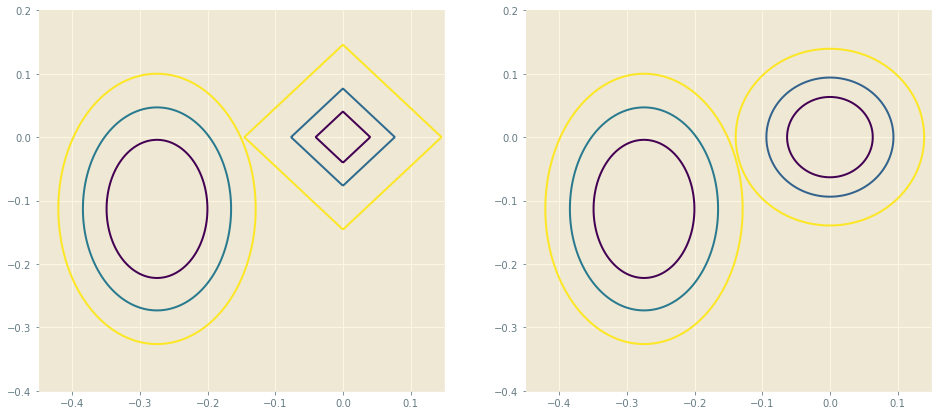

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


def lsobj(X, y, w):
    h = X @ w
    J = (h - y).T @ (h - y)
    return J


X = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0.697, 0.460],
    [2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0.774, 0.376],
    [3, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0.666, 0.091],
    [4, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0.245, 0.057], ])
y = np.array([1, 1, 0, 0])
y = y - y.mean()
X = PCA(n_components=2).fit_transform(X)

low_x, high_x, low_y, high_y = -0.45, 0.15, -0.4, 0.2
xx, yy = np.meshgrid(np.linspace(low_x, high_x, 500), np.linspace(low_y, high_y, 500))

zz_l1 = np.array([np.abs(xi) + np.abs(yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L1 function
zz_l2 = np.array([xi**2 + yi**2 for xi, yi in zip(np.ravel(xx), np.ravel(yy))])  # L2 function
zz_ls = np.array([lsobj(X, y.reshape(-1, 1), np.array([t0, t1]).reshape(-1, 1))
                  for t0, t1 in zip(np.ravel(xx), np.ravel(yy))])  # least square cost function
Z_l1, Z_l2, Z_ls = zz_l1.reshape(xx.shape), zz_l2.reshape(xx.shape), zz_ls.reshape(xx.shape)

fig = plt.figure(figsize=(16, 7))

levels_ls = [1.2**x for x in [-10, -8, -6]]
levels_l1 = [1.9**x for x in [-5, -4, -3]]
levels_l2 = [2.2**x for x in [-7, -6, -5]]

with plt.style.context('Solarize_Light2'):

    ax = fig.add_subplot(1, 2, 1)
    ax.contour(xx, yy, Z_l1, levels=levels_l1)
    ax.contour(xx, yy, Z_ls, levels=levels_ls)

    ax = fig.add_subplot(1, 2, 2)
    ax.contour(xx, yy, Z_l2, levels=levels_l2)
    ax.contour(xx, yy, Z_ls, levels=levels_ls)

plt.show()
